In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_column', None)

In [2]:
df=pd.read_csv('car_prices.csv',on_bad_lines='skip')
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [3]:
df.drop('vin',axis=1,inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558811 entries, 0 to 558810
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558811 non-null  int64  
 1   make          548510 non-null  object 
 2   model         548412 non-null  object 
 3   trim          548160 non-null  object 
 4   body          545616 non-null  object 
 5   transmission  493458 non-null  object 
 6   state         558811 non-null  object 
 7   condition     547017 non-null  float64
 8   odometer      558717 non-null  float64
 9   color         558062 non-null  object 
 10  interior      558062 non-null  object 
 11  seller        558811 non-null  object 
 12  mmr           558811 non-null  int64  
 13  sellingprice  558811 non-null  int64  
 14  saledate      558811 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 64.0+ MB


In [6]:
df.isnull().sum()/len(df)*100

year             0.000000
make             1.843378
model            1.860915
trim             1.906011
body             2.361263
transmission    11.695010
state            0.000000
condition        2.110553
odometer         0.016821
color            0.134035
interior         0.134035
seller           0.000000
mmr              0.000000
sellingprice     0.000000
saledate         0.000000
dtype: float64

In [7]:
df['transmission'].value_counts()

automatic    475914
manual        17544
Name: transmission, dtype: int64

In [8]:
df['transmission']=df['transmission'].fillna(df['transmission'].mode()[0])

In [9]:
df['condition']=df['condition'].fillna(df['condition'].mode()[0])

In [10]:
df=df.dropna()

In [11]:
df['saledate']

0         Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1         Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2         Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3         Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4         Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
                           ...                   
558806    Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558807    Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558808    Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558809    Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)
558810    Thu May 28 2015 05:30:00 GMT-0700 (PDT)
Name: saledate, Length: 544717, dtype: object

In [12]:
saledate = pd.DataFrame(df['saledate'])
saledate

,saledate
0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...
558806,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558807,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558808,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558809,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


In [13]:
get_month = lambda x: x.split()[1]

# Apply the lambda function to the date_column using map
df['sale_month'] = df['saledate'].map(get_month)

# Print the DataFrame with extracted date and month
print(df['sale_month'])

0         Dec
1         Dec
2         Jan
3         Jan
4         Dec
         ... 
558806    Jul
558807    Jul
558808    Jul
558809    Jul
558810    May
Name: sale_month, Length: 544717, dtype: object


In [14]:
get_year= lambda x: x.split()[3]
df['sale_year'] = df['saledate'].map(get_year)


In [15]:
df

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,sale_month,sale_year
0,2015,Kia,Sorento,LX,SUV,automatic,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),Dec,2014
1,2015,Kia,Sorento,LX,SUV,automatic,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),Dec,2014
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),Jan,2015
3,2015,Volvo,S60,T5,Sedan,automatic,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),Jan,2015
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),Dec,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558806,2015,Kia,K900,Luxury,Sedan,automatic,in,4.5,18255.0,silver,black,avis corporation,35300,33000,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT),Jul,2015
558807,2012,Ram,2500,Power Wagon,Crew Cab,automatic,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200,30800,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT),Jul,2015
558808,2012,BMW,X5,xDrive35d,SUV,automatic,ca,4.8,50561.0,black,black,financial services remarketing (lease),29800,34000,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT),Jul,2015
558809,2015,Nissan,Altima,2.5 S,sedan,automatic,ga,3.8,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100,11100,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT),Jul,2015


In [16]:
df=df.drop('saledate',axis=1)

In [17]:
df['sale_year']=pd.to_numeric(df['sale_year'])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 544717 entries, 0 to 558810
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          544717 non-null  int64  
 1   make          544717 non-null  object 
 2   model         544717 non-null  object 
 3   trim          544717 non-null  object 
 4   body          544717 non-null  object 
 5   transmission  544717 non-null  object 
 6   state         544717 non-null  object 
 7   condition     544717 non-null  float64
 8   odometer      544717 non-null  float64
 9   color         544717 non-null  object 
 10  interior      544717 non-null  object 
 11  seller        544717 non-null  object 
 12  mmr           544717 non-null  int64  
 13  sellingprice  544717 non-null  int64  
 14  sale_month    544717 non-null  object 
 15  sale_year     544717 non-null  int64  
dtypes: float64(2), int64(4), object(10)
memory usage: 70.6+ MB


In [19]:
num=df.select_dtypes(include='number')
cat=df.select_dtypes(include='object')

In [20]:
num

,year,condition,odometer,mmr,sellingprice,sale_year
0,2015,5.0,16639.0,20500,21500,2014
1,2015,5.0,9393.0,20800,21500,2014
2,2014,4.5,1331.0,31900,30000,2015
3,2015,4.1,14282.0,27500,27750,2015
4,2014,4.3,2641.0,66000,67000,2014
...,...,...,...,...,...,...
558806,2015,4.5,18255.0,35300,33000,2015
558807,2012,5.0,54393.0,30200,30800,2015
558808,2012,4.8,50561.0,29800,34000,2015
558809,2015,3.8,16658.0,15100,11100,2015


In [21]:
cat

,make,model,trim,body,transmission,state,color,interior,seller,sale_month
0,Kia,Sorento,LX,SUV,automatic,ca,white,black,"kia motors america, inc",Dec
1,Kia,Sorento,LX,SUV,automatic,ca,white,beige,"kia motors america, inc",Dec
2,BMW,3 Series,328i SULEV,Sedan,automatic,ca,gray,black,financial services remarketing (lease),Jan
3,Volvo,S60,T5,Sedan,automatic,ca,white,black,volvo na rep/world omni,Jan
4,BMW,6 Series Gran Coupe,650i,Sedan,automatic,ca,gray,black,financial services remarketing (lease),Dec
...,...,...,...,...,...,...,...,...,...,...
558806,Kia,K900,Luxury,Sedan,automatic,in,silver,black,avis corporation,Jul
558807,Ram,2500,Power Wagon,Crew Cab,automatic,wa,white,black,i -5 uhlmann rv,Jul
558808,BMW,X5,xDrive35d,SUV,automatic,ca,black,black,financial services remarketing (lease),Jul
558809,Nissan,Altima,2.5 S,sedan,automatic,ga,white,black,enterprise vehicle exchange / tra / rental / t...,Jul


Outlier Removal

In [23]:
def outlier_detection(df,col):
    plt.figure(figsize=(8,6))
    sns.boxplot(num[col])
    plt.title(f'Boxplot for {col}')

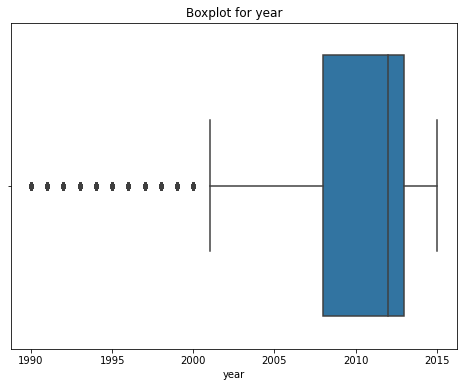

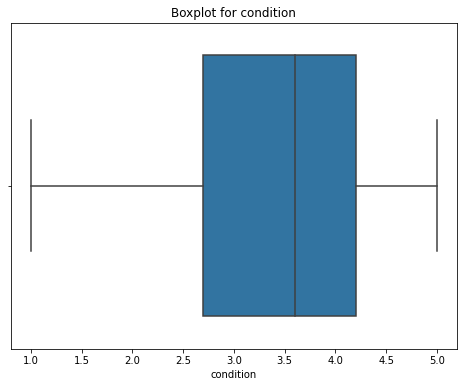

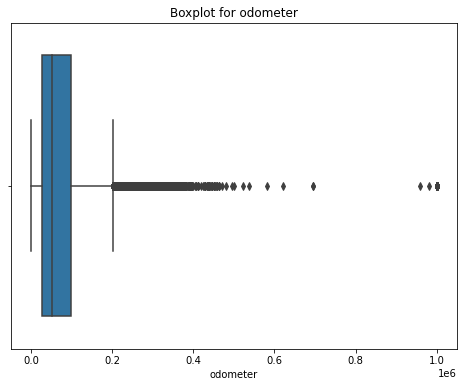

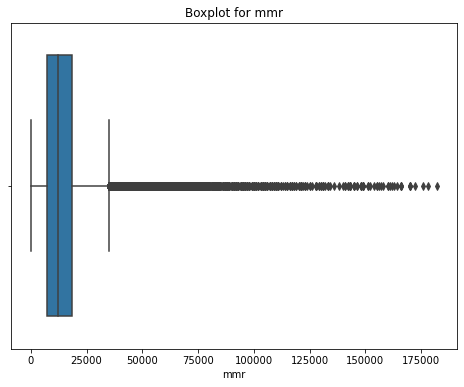

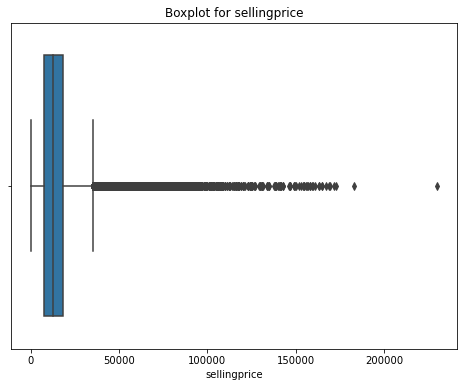

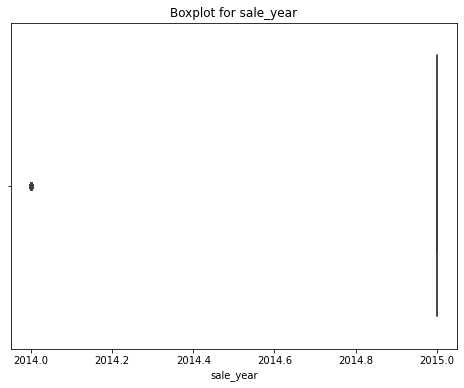

In [24]:
for item in num:
    outlier_detection(num,item)

In [25]:
outlier_col=num.drop(['year','sale_year','condition'],axis=1)
outlier_col

,odometer,mmr,sellingprice
0,16639.0,20500,21500
1,9393.0,20800,21500
2,1331.0,31900,30000
3,14282.0,27500,27750
4,2641.0,66000,67000
...,...,...,...
558806,18255.0,35300,33000
558807,54393.0,30200,30800
558808,50561.0,29800,34000
558809,16658.0,15100,11100


In [26]:
Q1 = outlier_col.quantile(0.25)
Q3 =outlier_col.quantile(0.75)
IQR = Q3 - Q1

outliers = ((outlier_col< (Q1 - 1.5 * IQR)) | (outlier_col> (Q3 + 1.5 * IQR))).any(axis=1)

In [27]:
outliers

0         False
1         False
2         False
3         False
4          True
          ...  
558806     True
558807    False
558808    False
558809    False
558810    False
Length: 544717, dtype: bool

In [28]:
def remove_outliers_clip(df, column_name):
    
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)

    
    IQR = Q3 - Q1

    
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    df[column_name] = df[column_name].clip(lower=lower_bound, upper=upper_bound)

    return df

In [29]:
remove_outliers_clip(df,'year')

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,sale_month,sale_year
0,2015.0,Kia,Sorento,LX,SUV,automatic,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Dec,2014
1,2015.0,Kia,Sorento,LX,SUV,automatic,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Dec,2014
2,2014.0,BMW,3 Series,328i SULEV,Sedan,automatic,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Jan,2015
3,2015.0,Volvo,S60,T5,Sedan,automatic,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Jan,2015
4,2014.0,BMW,6 Series Gran Coupe,650i,Sedan,automatic,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Dec,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558806,2015.0,Kia,K900,Luxury,Sedan,automatic,in,4.5,18255.0,silver,black,avis corporation,35300,33000,Jul,2015
558807,2012.0,Ram,2500,Power Wagon,Crew Cab,automatic,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200,30800,Jul,2015
558808,2012.0,BMW,X5,xDrive35d,SUV,automatic,ca,4.8,50561.0,black,black,financial services remarketing (lease),29800,34000,Jul,2015
558809,2015.0,Nissan,Altima,2.5 S,sedan,automatic,ga,3.8,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100,11100,Jul,2015


In [30]:
remove_outliers_clip(df,'odometer')

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,sale_month,sale_year
0,2015.0,Kia,Sorento,LX,SUV,automatic,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Dec,2014
1,2015.0,Kia,Sorento,LX,SUV,automatic,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Dec,2014
2,2014.0,BMW,3 Series,328i SULEV,Sedan,automatic,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Jan,2015
3,2015.0,Volvo,S60,T5,Sedan,automatic,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Jan,2015
4,2014.0,BMW,6 Series Gran Coupe,650i,Sedan,automatic,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Dec,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558806,2015.0,Kia,K900,Luxury,Sedan,automatic,in,4.5,18255.0,silver,black,avis corporation,35300,33000,Jul,2015
558807,2012.0,Ram,2500,Power Wagon,Crew Cab,automatic,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200,30800,Jul,2015
558808,2012.0,BMW,X5,xDrive35d,SUV,automatic,ca,4.8,50561.0,black,black,financial services remarketing (lease),29800,34000,Jul,2015
558809,2015.0,Nissan,Altima,2.5 S,sedan,automatic,ga,3.8,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100,11100,Jul,2015


In [31]:
remove_outliers_clip(df,'mmr')

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,sale_month,sale_year
0,2015.0,Kia,Sorento,LX,SUV,automatic,ca,5.0,16639.0,white,black,"kia motors america, inc",20500.0,21500,Dec,2014
1,2015.0,Kia,Sorento,LX,SUV,automatic,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800.0,21500,Dec,2014
2,2014.0,BMW,3 Series,328i SULEV,Sedan,automatic,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900.0,30000,Jan,2015
3,2015.0,Volvo,S60,T5,Sedan,automatic,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500.0,27750,Jan,2015
4,2014.0,BMW,6 Series Gran Coupe,650i,Sedan,automatic,ca,4.3,2641.0,gray,black,financial services remarketing (lease),35012.5,67000,Dec,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558806,2015.0,Kia,K900,Luxury,Sedan,automatic,in,4.5,18255.0,silver,black,avis corporation,35012.5,33000,Jul,2015
558807,2012.0,Ram,2500,Power Wagon,Crew Cab,automatic,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800,Jul,2015
558808,2012.0,BMW,X5,xDrive35d,SUV,automatic,ca,4.8,50561.0,black,black,financial services remarketing (lease),29800.0,34000,Jul,2015
558809,2015.0,Nissan,Altima,2.5 S,sedan,automatic,ga,3.8,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100,Jul,2015


In [32]:
remove_outliers_clip(df,'sellingprice')

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,sale_month,sale_year
0,2015.0,Kia,Sorento,LX,SUV,automatic,ca,5.0,16639.0,white,black,"kia motors america, inc",20500.0,21500.0,Dec,2014
1,2015.0,Kia,Sorento,LX,SUV,automatic,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800.0,21500.0,Dec,2014
2,2014.0,BMW,3 Series,328i SULEV,Sedan,automatic,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Jan,2015
3,2015.0,Volvo,S60,T5,Sedan,automatic,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Jan,2015
4,2014.0,BMW,6 Series Gran Coupe,650i,Sedan,automatic,ca,4.3,2641.0,gray,black,financial services remarketing (lease),35012.5,35100.0,Dec,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558806,2015.0,Kia,K900,Luxury,Sedan,automatic,in,4.5,18255.0,silver,black,avis corporation,35012.5,33000.0,Jul,2015
558807,2012.0,Ram,2500,Power Wagon,Crew Cab,automatic,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Jul,2015
558808,2012.0,BMW,X5,xDrive35d,SUV,automatic,ca,4.8,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Jul,2015
558809,2015.0,Nissan,Altima,2.5 S,sedan,automatic,ga,3.8,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Jul,2015


Checking If outliers have been removed

In [33]:
Q1 = outlier_col.quantile(0.25)
Q3 =df.quantile(0.75)
IQR = Q3 - Q1

outliers = ((df< (Q1 - 1.5 * IQR)) | (df> (Q3 + 1.5 * IQR))).any(axis=1)

In [34]:
outliers

0         False
1         False
2         False
3         False
4         False
          ...  
558806    False
558807    False
558808    False
558809    False
558810    False
Length: 544717, dtype: bool

## EDA

In [35]:
num=df.select_dtypes(include='number')
cat=df.select_dtypes(include='object')

In [36]:
def dist_plot(df,col):
    plt.figure(figsize=(8,6))
    sns.distplot(num[col])
    plt.title(f'Distribution for {col}')

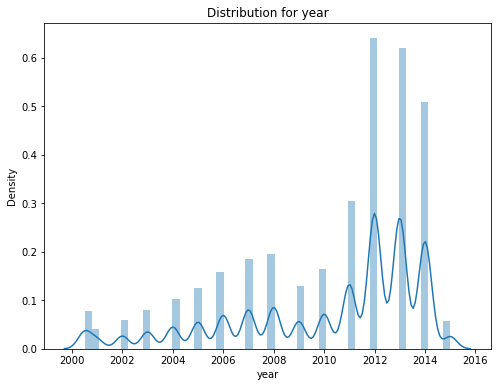

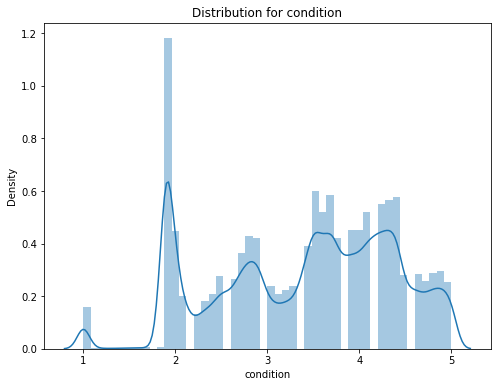

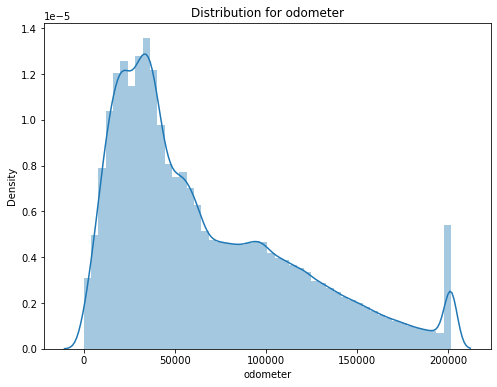

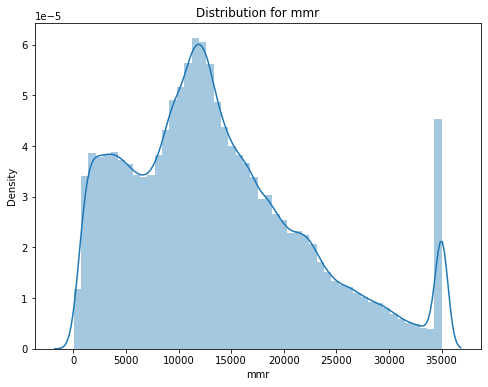

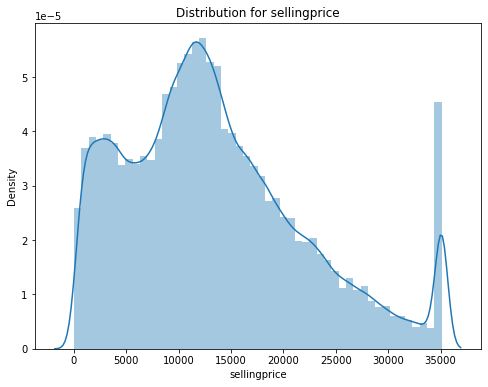

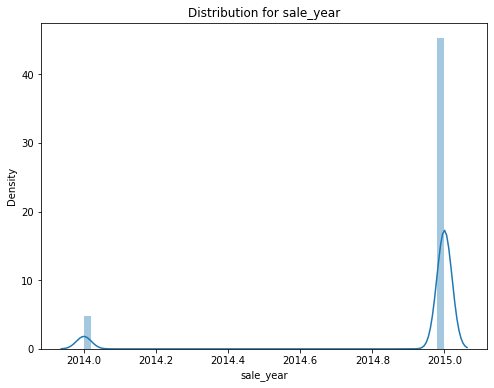

In [37]:
for item in num:
    dist_plot(num,item)

In [38]:
num.describe()

,year,condition,odometer,mmr,sellingprice,sale_year
count,544717.000000,544717.000000,544717.000000,544717.000000,544717.000000,544717.000000
mean,2010.191892,3.404814,66518.463742,13567.983421,13412.524074,2014.904875
std,3.729863,0.960609,49436.858880,8400.781000,8496.390347,0.293387
min,2000.500000,1.000000,1.000000,25.000000,1.000000,2014.000000
25%,2008.000000,2.700000,28078.000000,7325.000000,7100.000000,2015.000000
50%,2012.000000,3.600000,51166.000000,12350.000000,12200.000000,2015.000000
75%,2013.000000,4.200000,97538.000000,18400.000000,18300.000000,2015.000000
max,2015.000000,5.000000,201728.000000,35012.500000,35100.000000,2015.000000


In [39]:
 def hist_plot(df,col):
    plt.figure(figsize=(8,6))
    sns.histplot(num[col])
    plt.title(f'Distribution for {col}')

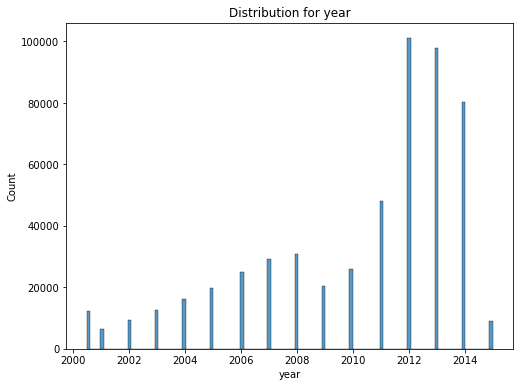

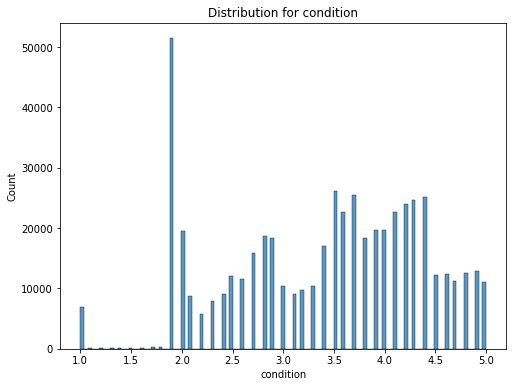

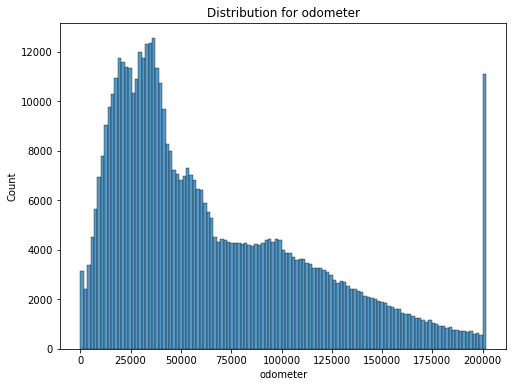

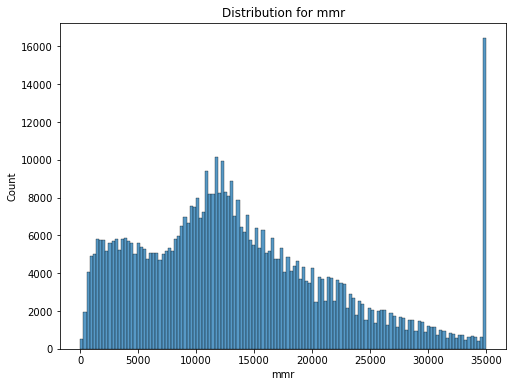

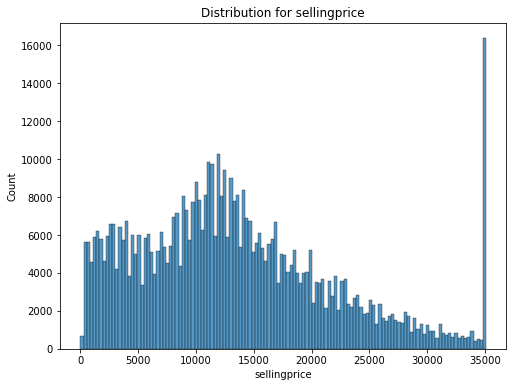

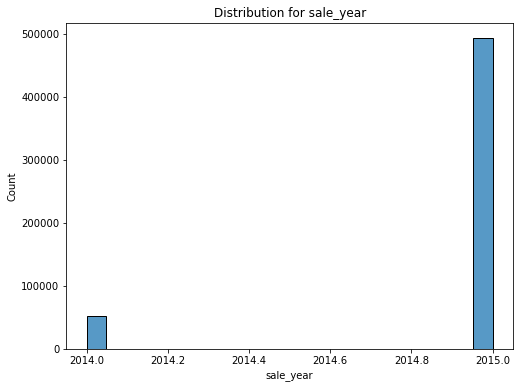

In [40]:
for item in num:
    hist_plot(num,item)

In [41]:
num.skew()

year           -0.980832
condition      -0.325418
odometer        0.952334
mmr             0.682490
sellingprice    0.677018
sale_year      -2.760017
dtype: float64

The sale year is highly negativley skewed</br>
rest of the columns are slightly skewed except for condition which has a normal negative skew</br>


In [42]:
cat

,make,model,trim,body,transmission,state,color,interior,seller,sale_month
0,Kia,Sorento,LX,SUV,automatic,ca,white,black,"kia motors america, inc",Dec
1,Kia,Sorento,LX,SUV,automatic,ca,white,beige,"kia motors america, inc",Dec
2,BMW,3 Series,328i SULEV,Sedan,automatic,ca,gray,black,financial services remarketing (lease),Jan
3,Volvo,S60,T5,Sedan,automatic,ca,white,black,volvo na rep/world omni,Jan
4,BMW,6 Series Gran Coupe,650i,Sedan,automatic,ca,gray,black,financial services remarketing (lease),Dec
...,...,...,...,...,...,...,...,...,...,...
558806,Kia,K900,Luxury,Sedan,automatic,in,silver,black,avis corporation,Jul
558807,Ram,2500,Power Wagon,Crew Cab,automatic,wa,white,black,i -5 uhlmann rv,Jul
558808,BMW,X5,xDrive35d,SUV,automatic,ca,black,black,financial services remarketing (lease),Jul
558809,Nissan,Altima,2.5 S,sedan,automatic,ga,white,black,enterprise vehicle exchange / tra / rental / t...,Jul


In [43]:

unique_values = pd.DataFrame(cat.apply(lambda x: len(x.value_counts(dropna=False)), axis=0), columns=['Unique Value Count']).sort_values(by='Unique Value Count', ascending=True)

unique_values['dtype'] = pd.DataFrame(cat.dtypes)

unique_values

,Unique Value Count,dtype
transmission,2,object
sale_month,8,object
interior,17,object
color,20,object
state,38,object
make,53,object
body,86,object
model,776,object
trim,1528,object
seller,13993,object


<AxesSubplot:xlabel='transmission', ylabel='count'>

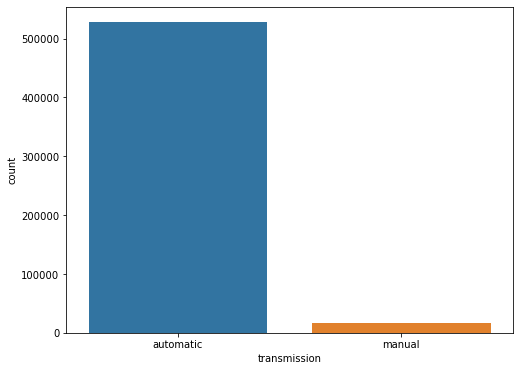

In [44]:
plt.figure(figsize=(8,6))
sns.countplot(df['transmission'])

Most number of cars have automatic transmission

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'black'),
  Text(1, 0, 'beige'),
  Text(2, 0, 'tan'),
  Text(3, 0, '—'),
  Text(4, 0, 'gray'),
  Text(5, 0, 'brown'),
  Text(6, 0, 'burgundy'),
  Text(7, 0, 'white'),
  Text(8, 0, 'silver'),
  Text(9, 0, 'off-white'),
  Text(10, 0, 'red'),
  Text(11, 0, 'yellow'),
  Text(12, 0, 'blue'),
  Text(13, 0, 'green'),
  Text(14, 0, 'purple'),
  Text(15, 0, 'orange'),
  Text(16, 0, 'gold')])

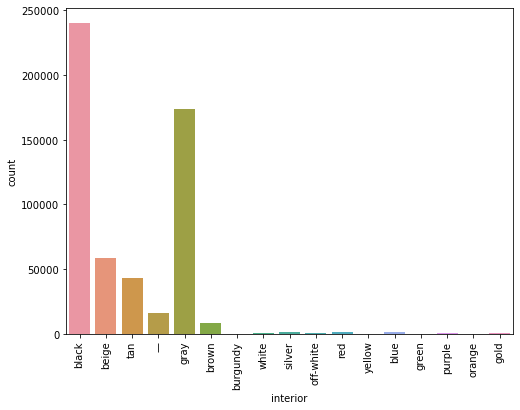

In [45]:
plt.figure(figsize=(8,6))
sns.countplot(df['interior'])
plt.xticks(rotation=90)

Most used Interior are Black and Gray 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'white'),
  Text(1, 0, 'gray'),
  Text(2, 0, 'black'),
  Text(3, 0, 'red'),
  Text(4, 0, 'silver'),
  Text(5, 0, 'blue'),
  Text(6, 0, 'brown'),
  Text(7, 0, 'beige'),
  Text(8, 0, 'purple'),
  Text(9, 0, 'burgundy'),
  Text(10, 0, '—'),
  Text(11, 0, 'gold'),
  Text(12, 0, 'yellow'),
  Text(13, 0, 'green'),
  Text(14, 0, 'charcoal'),
  Text(15, 0, 'orange'),
  Text(16, 0, 'off-white'),
  Text(17, 0, 'turquoise'),
  Text(18, 0, 'pink'),
  Text(19, 0, 'lime')])

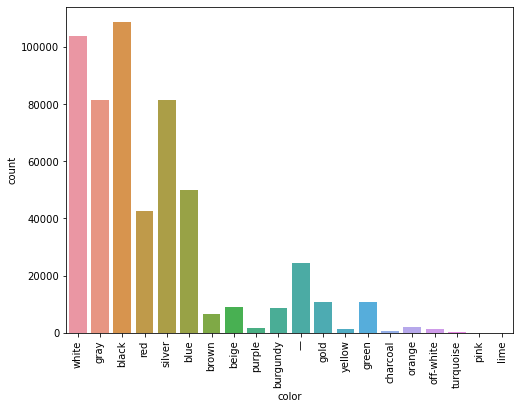

In [47]:
plt.figure(figsize=(8,6))
sns.countplot(df['color'])
plt.xticks(rotation=90)

Most colour of cars are white , black, ggray, silver and average number of cars have colour red and blue

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52]),
 [Text(0, 0, 'Kia'),
  Text(1, 0, 'BMW'),
  Text(2, 0, 'Volvo'),
  Text(3, 0, 'Nissan'),
  Text(4, 0, 'Chevrolet'),
  Text(5, 0, 'Audi'),
  Text(6, 0, 'Ford'),
  Text(7, 0, 'Hyundai'),
  Text(8, 0, 'Buick'),
  Text(9, 0, 'Cadillac'),
  Text(10, 0, 'Acura'),
  Text(11, 0, 'Lexus'),
  Text(12, 0, 'Infiniti'),
  Text(13, 0, 'Jeep'),
  Text(14, 0, 'Mercedes-Benz'),
  Text(15, 0, 'Mitsubishi'),
  Text(16, 0, 'Mazda'),
  Text(17, 0, 'MINI'),
  Text(18, 0, 'Land Rover'),
  Text(19, 0, 'Lincoln'),
  Text(20, 0, 'Jaguar'),
  Text(21, 0, 'Volkswagen'),
  Text(22, 0, 'Toyota'),
  Text(23, 0, 'Subaru'),
  Text(24, 0, 'Scion'),
  Text(25, 0, 'Porsche'),
  Text(26, 0, 'Dodge'),
  Text(27, 0, 'FIAT'),
  Text(28, 0, 'Chrysler'),
  Text(29, 0, 'Ferrari'),
  Tex

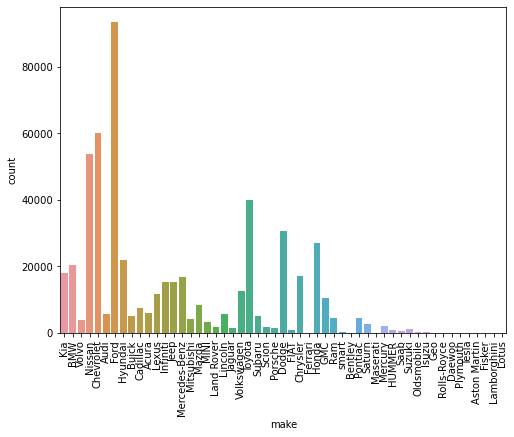

In [48]:
plt.figure(figsize=(8,6))
sns.countplot(df['make'])
plt.xticks(rotation=90)

Ford is the most number of cars availabel

In [50]:
df

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,sale_month,sale_year
0,2015.0,Kia,Sorento,LX,SUV,automatic,ca,5.0,16639.0,white,black,"kia motors america, inc",20500.0,21500.0,Dec,2014
1,2015.0,Kia,Sorento,LX,SUV,automatic,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800.0,21500.0,Dec,2014
2,2014.0,BMW,3 Series,328i SULEV,Sedan,automatic,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Jan,2015
3,2015.0,Volvo,S60,T5,Sedan,automatic,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Jan,2015
4,2014.0,BMW,6 Series Gran Coupe,650i,Sedan,automatic,ca,4.3,2641.0,gray,black,financial services remarketing (lease),35012.5,35100.0,Dec,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558806,2015.0,Kia,K900,Luxury,Sedan,automatic,in,4.5,18255.0,silver,black,avis corporation,35012.5,33000.0,Jul,2015
558807,2012.0,Ram,2500,Power Wagon,Crew Cab,automatic,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Jul,2015
558808,2012.0,BMW,X5,xDrive35d,SUV,automatic,ca,4.8,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Jul,2015
558809,2015.0,Nissan,Altima,2.5 S,sedan,automatic,ga,3.8,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Jul,2015


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'white'),
  Text(1, 0, 'gray'),
  Text(2, 0, 'black'),
  Text(3, 0, 'red'),
  Text(4, 0, 'silver'),
  Text(5, 0, 'blue'),
  Text(6, 0, 'brown'),
  Text(7, 0, 'beige'),
  Text(8, 0, 'purple'),
  Text(9, 0, 'burgundy'),
  Text(10, 0, '—'),
  Text(11, 0, 'gold'),
  Text(12, 0, 'yellow'),
  Text(13, 0, 'green'),
  Text(14, 0, 'charcoal'),
  Text(15, 0, 'orange'),
  Text(16, 0, 'off-white'),
  Text(17, 0, 'turquoise'),
  Text(18, 0, 'pink'),
  Text(19, 0, 'lime')])

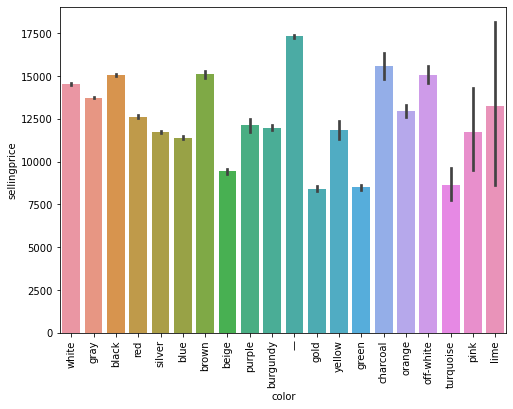

In [54]:
plt.figure(figsize=(8,6))
sns.barplot(x=df['color'],y=df['sellingprice'])
plt.xticks(rotation=90)

In [60]:
df['transmission']=df['transmission'].map({'automatic':1,'manual':0})

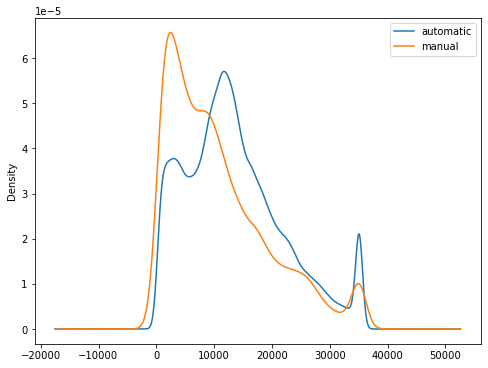

In [61]:
plt.figure(figsize=(8,6))
df[df['transmission']==1]['sellingprice'].plot(kind='kde',label='automatic')
df[df['transmission']==0]['sellingprice'].plot(kind='kde',label='manual')
plt.legend()
plt.show()

In [62]:
df

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,sale_month,sale_year
0,2015.0,Kia,Sorento,LX,SUV,1,ca,5.0,16639.0,white,black,"kia motors america, inc",20500.0,21500.0,Dec,2014
1,2015.0,Kia,Sorento,LX,SUV,1,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800.0,21500.0,Dec,2014
2,2014.0,BMW,3 Series,328i SULEV,Sedan,1,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Jan,2015
3,2015.0,Volvo,S60,T5,Sedan,1,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Jan,2015
4,2014.0,BMW,6 Series Gran Coupe,650i,Sedan,1,ca,4.3,2641.0,gray,black,financial services remarketing (lease),35012.5,35100.0,Dec,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558806,2015.0,Kia,K900,Luxury,Sedan,1,in,4.5,18255.0,silver,black,avis corporation,35012.5,33000.0,Jul,2015
558807,2012.0,Ram,2500,Power Wagon,Crew Cab,1,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Jul,2015
558808,2012.0,BMW,X5,xDrive35d,SUV,1,ca,4.8,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Jul,2015
558809,2015.0,Nissan,Altima,2.5 S,sedan,1,ga,3.8,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Jul,2015


In [66]:
sale_model=df.groupby('year')['make'].count().sort_values(ascending=False).reset_index().rename(columns={'make':'total_units'})
sale_model

,year,total_units
0,2012.0,101079
1,2013.0,97960
2,2014.0,80220
3,2011.0,48049
4,2008.0,30931
5,2007.0,29095
6,2010.0,25827
7,2006.0,24973
8,2009.0,20357
9,2005.0,19901


Text(0, 0.5, 'Total Units')

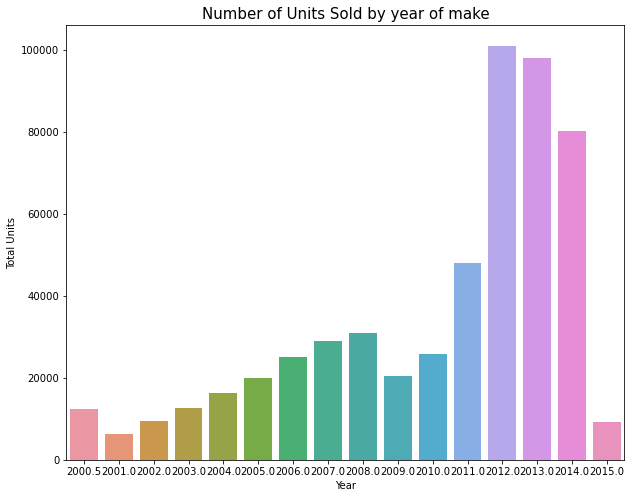

In [74]:
plt.figure(figsize=(10,8))
sns.barplot(x='year',y='total_units',data=sale_model.sort_values(by='year',ascending=True),palette=sns.set_palette('Set1'))
plt.title('Number of Units Sold by year of make',fontsize=15)
plt.xlabel('Year',fontsize=10)
plt.ylabel('Total Units',fontsize=10)

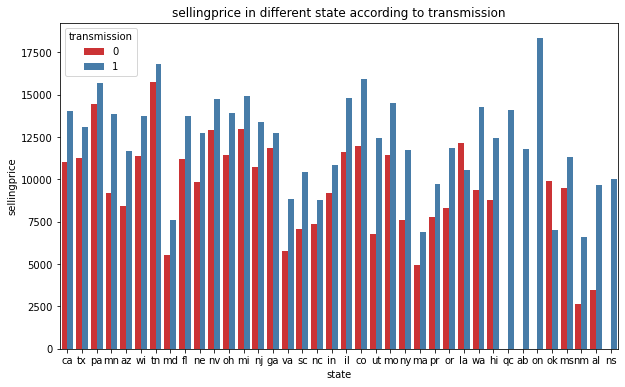

In [77]:

plt.figure(figsize=(10,6))
sns.barplot(x=df['state'], y=df['sellingprice'], hue=df['transmission'], ci=None, palette="Set1")
plt.title("sellingprice in different state according to transmission")
plt.ylabel("sellingprice")
plt.show()

In [84]:
from sklearn.preprocessing import LabelEncoder

# instanciar encoder
lb = LabelEncoder()

objList = df.select_dtypes(include = "object").columns

for obj in objList:
    df[obj] = lb.fit_transform(df[obj].astype(str))

In [85]:
df

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,sale_month,sale_year
0,2015.0,24,645,839,35,1,3,5.0,16639.0,17,1,7072,20500.0,21500.0,1,2014
1,2015.0,24,645,839,35,1,3,5.0,9393.0,17,0,7072,20800.0,21500.0,1,2014
2,2014.0,3,8,263,36,1,3,4.5,1331.0,7,1,4879,31900.0,30000.0,3,2015
3,2015.0,51,583,1243,36,1,3,4.1,14282.0,17,1,13536,27500.0,27750.0,3,2015
4,2014.0,3,33,346,36,1,3,4.3,2641.0,7,1,4879,35012.5,35100.0,1,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558806,2015.0,24,375,894,36,1,9,4.5,18255.0,15,1,1506,35012.5,33000.0,4,2015
558807,2012.0,41,6,951,11,1,36,5.0,54393.0,17,1,6346,30200.0,30800.0,4,2015
558808,2012.0,3,730,1523,35,1,3,4.8,50561.0,1,1,4879,29800.0,34000.0,4,2015
558809,2015.0,36,63,106,77,1,6,3.8,16658.0,17,1,4517,15100.0,11100.0,4,2015


In [97]:
X=df.drop('sellingprice',axis=1)
y=df['sellingprice']


In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

In [99]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0.05)

In [90]:
sel.fit(X_train)


VarianceThreshold(threshold=0.05)

In [91]:
sel.get_support()

array([ True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [92]:
sum(sel.get_support())

14

In [93]:
len(sel.get_support())

15

In [94]:
columns = X_train.columns[sel.get_support()]
columns

Index(['year', 'make', 'model', 'trim', 'body', 'state', 'condition',
       'odometer', 'color', 'interior', 'seller', 'mmr', 'sale_month',
       'sale_year'],
      dtype='object')

In [101]:

X_train = pd.DataFrame(X_train, columns=columns)
X_test = pd.DataFrame(X_test, columns=columns)

In [102]:
print(X_train.shape)
print(X_test.shape)

(435773, 14)
(108944, 14)


<AxesSubplot:>

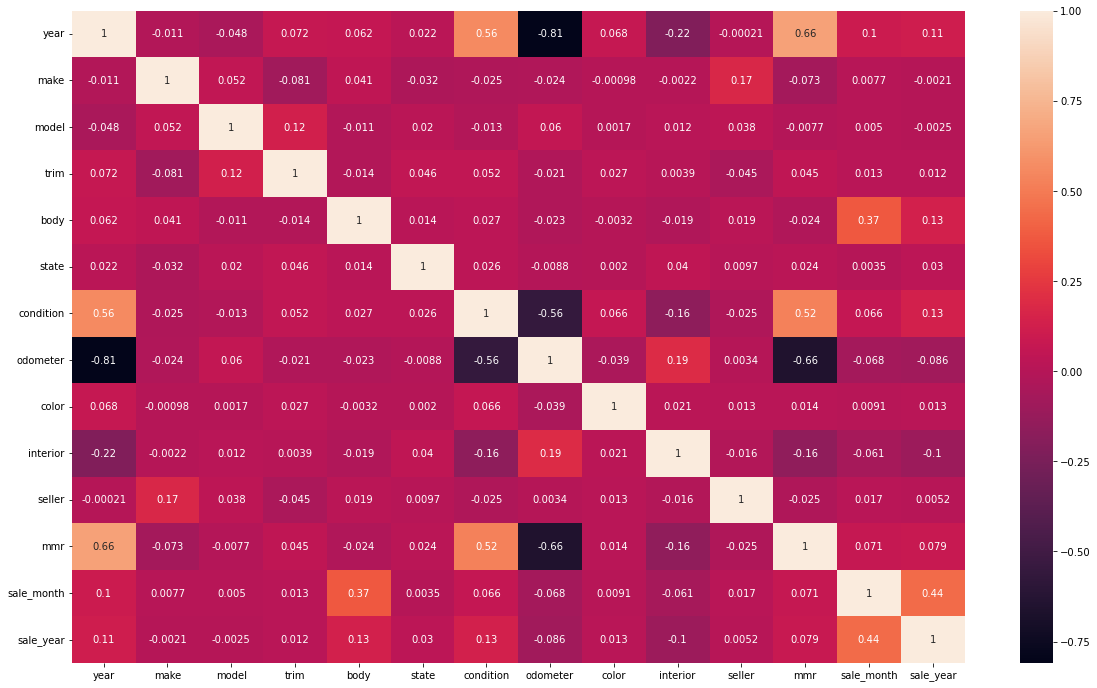

In [104]:
plt.figure(figsize=(20,12))
sns.heatmap(X_train.corr(),annot=True)

In [105]:
corr_matrix = X_train.corr()
columns = corr_matrix.columns

# Create an empty list to keep track of columns to drop
columns_to_drop = []

# Loop over the columns
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        # Access the cell of the DataFrame
        if corr_matrix.loc[columns[i], columns[j]] > 0.95:
            columns_to_drop.append(columns[j])

print(len(columns_to_drop))

0


In [119]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [120]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [121]:
model = LinearRegression()

print("training",np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring='r2')))
print("testing",np.mean(cross_val_score(model, X_test, y_test, cv=5, scoring='r2')))

training 0.9712062682421891
testing 0.9718729806220686
